In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('FAU_Bank_Turnover.csv')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_satisfaction_level         14999 non-null  float64
 1   engagement_with_task           14999 non-null  float64
 2   last_performance_evaluation    14999 non-null  float64
 3   completed_projects             14999 non-null  int64  
 4   average_working_hours_monthly  14999 non-null  int64  
 5   years_spent_with_company       14999 non-null  int64  
 6   received_support               14999 non-null  int64  
 7   left                           14999 non-null  int64  
 8   promotion_last_5years          14999 non-null  int64  
 9   job_role                       14999 non-null  object 
 10  salary                         14999 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB
None


In [18]:
df.head(7)

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,low
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,medium
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,medium
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,low
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,low
5,0.41,0.66,0.50,2,153,3,0,1,0,hr,low
6,0.10,0.06,0.77,6,247,4,0,1,0,investment_banker,low


In [12]:
print(df.describe())

       job_satisfaction_level  engagement_with_task  \
count            14999.000000          14999.000000   
mean                 0.612834              0.497528   
std                  0.248631              0.288975   
min                  0.090000              0.000000   
25%                  0.440000              0.250000   
50%                  0.640000              0.500000   
75%                  0.820000              0.750000   
max                  1.000000              1.000000   

       last_performance_evaluation  completed_projects  \
count                 14999.000000        14999.000000   
mean                      0.716102            3.803054   
std                       0.171169            1.232592   
min                       0.360000            2.000000   
25%                       0.560000            3.000000   
50%                       0.720000            4.000000   
75%                       0.870000            5.000000   
max                       1.000000      

In [16]:
avg_job_satisfaction_left = df[df['left'] == 1]['job_satisfaction_level'].mean()
print(f'Average Job Satisfaction of Employees Who Left: {avg_job_satisfaction_left}')

Average Job Satisfaction of Employees Who Left: 0.4400980117614114


In [34]:
df.isnull().values.any()

False

In [30]:
# average salary satisfaction level of employees who left FAU Bank
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)
df.head()                              

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,1
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,2
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,2
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,1
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,1


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['job_satisfaction_level_normalized'] = scaler.fit_transform(df[['job_satisfaction_level']])
df['salary_satisfaction'] = df['job_satisfaction_level_normalized'] * df['salary']
avg_salary_satisfaction_left_new = df[df['left'] == 1]['salary_satisfaction'].mean()
print(f'Average salary satisfaction level of employees who left FAU Bank: {avg_salary_satisfaction_left_new}')

Average salary satisfaction level of employees who left FAU Bank: 0.5433698197629869


In [52]:
salary_distribution_left = df[df['left'] == 1]['salary'].value_counts(normalize=True) * 100

print(f'Salary Distribution of Employees Who Left:\n{salary_distribution_left}')

Salary Distribution of Employees Who Left:
salary
1    60.823299
2    36.880426
3     2.296276
Name: proportion, dtype: float64


In [56]:
salary_distribution_left.mean()

33.333333333333336

In [68]:
avg_salary_satisfaction_left = df[df['left'] == 1]['salary'].mean()
print(f'Average salary satisfaction: {avg_salary_satisfaction_left}')

Average salary satisfaction: 1.4147297675721087


In [64]:
# Calculating the average years spent with the company for employees who left
avg_years_with_company_left = df[df['left'] == 1]['years_spent_with_company'].mean()
print(f'Average years spent with FAU Bank for employees who left: {avg_years_with_company_left}')

Average years spent with FAU Bank for employees who left: 3.876505180621675


In [32]:
unique_values = df['job_role'].unique()
print(unique_values)

['investment_banker' 'hr' 'bank_teller' 'mortgag_consultant'
 'loan_analyst' 'business_analyst' 'IT' 'customer_service'
 'credit_analyst' 'finance_analystD']


In [104]:
df = pd.read_csv('FAU_Bank_Turnover.csv')
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary
0,0.38,0.19,0.53,2,157,3,0,1,0,investment_banker,low
1,0.80,0.72,0.86,5,262,6,0,1,0,investment_banker,medium
2,0.11,0.82,0.88,7,272,4,0,1,0,investment_banker,medium
3,0.72,0.66,0.87,5,223,5,0,1,0,investment_banker,low
4,0.37,0.52,0.52,2,159,3,0,1,0,investment_banker,low


In [106]:
job_mapping = {'investment_banker':0, 'hr':1, 'bank_teller':2, 'mortgag_consultant':3, 'loan_analyst':4, 'business_analyst':5, 'IT':6, 'customer_service':7, 'credit_analyst':8, 'finance_analystD':9}
df['job_role'] = df['job_role'].map(job_mapping)
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary
0,0.38,0.19,0.53,2,157,3,0,1,0,0,low
1,0.80,0.72,0.86,5,262,6,0,1,0,0,medium
2,0.11,0.82,0.88,7,272,4,0,1,0,0,medium
3,0.72,0.66,0.87,5,223,5,0,1,0,0,low
4,0.37,0.52,0.52,2,159,3,0,1,0,0,low


In [122]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)
df.head(10)

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary,job_satisfaction_level_normalized,last_performance_evaluation_normalized,job_satisfaction_binned,performance_evaluation_binned,project_hours_interaction
0,0.38,0.19,0.53,2,157,3,0,1,0,0,NaN,0.318681,0.265625,1,1,314
1,0.80,0.72,0.86,5,262,6,0,1,0,0,NaN,0.780220,0.781250,3,3,1310
2,0.11,0.82,0.88,7,272,4,0,1,0,0,NaN,0.021978,0.812500,0,4,1904
3,0.72,0.66,0.87,5,223,5,0,1,0,0,NaN,0.692308,0.796875,3,3,1115
4,0.37,0.52,0.52,2,159,3,0,1,0,0,NaN,0.307692,0.250000,1,1,318
5,0.41,0.66,0.50,2,153,3,0,1,0,1,NaN,0.351648,0.218750,1,1,306
6,0.10,0.06,0.77,6,247,4,0,1,0,0,NaN,0.010989,0.640625,0,3,1482
7,0.92,0.81,0.85,5,259,5,0,1,0,0,NaN,0.912088,0.765625,4,3,1295
8,0.89,0.88,1.00,5,224,5,0,1,0,0,NaN,0.879121,1.000000,4,4,1120
9,0.42,0.20,0.53,2,142,3,0,1,0,0,NaN,0.362637,0.265625,1,1,284


In [112]:
# Calculating the correlation matrix and discuss findings
correlation_matrix = df.corr()

In [114]:
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)

(avg_job_satisfaction_left, avg_salary_satisfaction_left, avg_years_with_company_left, correlation_matrix, correlation_with_left)

(0.4400980117614114,
 1.4147297675721087,
 3.876505180621675,
                                job_satisfaction_level  engagement_with_task  \
 job_satisfaction_level                       1.000000             -0.011563   
 engagement_with_task                        -0.011563              1.000000   
 last_performance_evaluation                  0.105021             -0.003407   
 completed_projects                          -0.142970             -0.012387   
 average_working_hours_monthly               -0.020048              0.003067   
 years_spent_with_company                    -0.100866             -0.001676   
 received_support                             0.058697             -0.001035   
 left                                        -0.388375              0.011749   
 promotion_last_5years                        0.025605             -0.010109   
 job_role                                     0.012291             -0.010678   
 salary                                       0.050022    

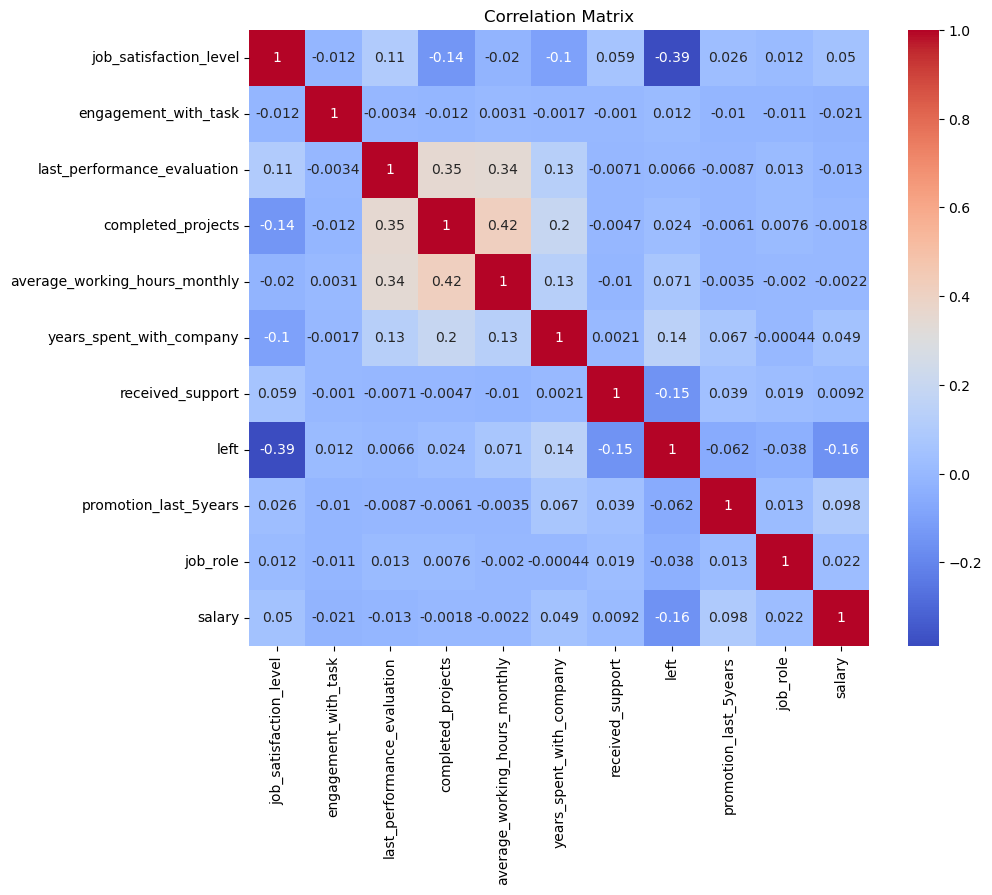

In [116]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [118]:
print('Correlation Matrix:\n', correlation_matrix)

Correlation Matrix:
                                job_satisfaction_level  engagement_with_task  \
job_satisfaction_level                       1.000000             -0.011563   
engagement_with_task                        -0.011563              1.000000   
last_performance_evaluation                  0.105021             -0.003407   
completed_projects                          -0.142970             -0.012387   
average_working_hours_monthly               -0.020048              0.003067   
years_spent_with_company                    -0.100866             -0.001676   
received_support                             0.058697             -0.001035   
left                                        -0.388375              0.011749   
promotion_last_5years                        0.025605             -0.010109   
job_role                                     0.012291             -0.010678   
salary                                       0.050022             -0.021273   

                              

In [120]:
# Normalizing the job satisfaction level and last performance evaluation for binning
scaler = MinMaxScaler()
df['job_satisfaction_level_normalized'] = scaler.fit_transform(df[['job_satisfaction_level']])
df['last_performance_evaluation_normalized'] = scaler.fit_transform(df[['last_performance_evaluation']])

# Data binning for the job satisfaction level
df['job_satisfaction_binned'] = pd.cut(df['job_satisfaction_level_normalized'], bins=5, labels=False)

# Data binning for the last performance evaluation
df['performance_evaluation_binned'] = pd.cut(df['last_performance_evaluation_normalized'], bins=5, labels=False)

# Combining completed projects and average working hours
df['project_hours_interaction'] = df['completed_projects'] * df['average_working_hours_monthly']

# Display of the first few rows to verify the changes
df.head()

,job_satisfaction_level,engagement_with_task,last_performance_evaluation,completed_projects,average_working_hours_monthly,years_spent_with_company,received_support,left,promotion_last_5years,job_role,salary,job_satisfaction_level_normalized,last_performance_evaluation_normalized,job_satisfaction_binned,performance_evaluation_binned,project_hours_interaction
0,0.38,0.19,0.53,2,157,3,0,1,0,0,1,0.318681,0.265625,1,1,314
1,0.80,0.72,0.86,5,262,6,0,1,0,0,2,0.780220,0.781250,3,3,1310
2,0.11,0.82,0.88,7,272,4,0,1,0,0,2,0.021978,0.812500,0,4,1904
3,0.72,0.66,0.87,5,223,5,0,1,0,0,1,0.692308,0.796875,3,3,1115
4,0.37,0.52,0.52,2,159,3,0,1,0,0,1,0.307692,0.250000,1,1,318


In [124]:
# Pearson correlation coefficient between completed_projects and average_working_hours_monthly
correlation = df['completed_projects'].corr(df['average_working_hours_monthly'])


print(f"Pearson correlation coefficient between completed_projects and average_working_hours_monthly: {correlation}")


Pearson correlation coefficient between completed_projects and average_working_hours_monthly: 0.41721063440177714
